In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset = dataset.astype(int)

In [5]:
  dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dataset = dataset.astype(int)

In [7]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [8]:
dependent=dataset[['charges']]

In [9]:
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(max_depth=3,min_samples_leaf=100)
regressor=regressor.fit(X_train,Y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

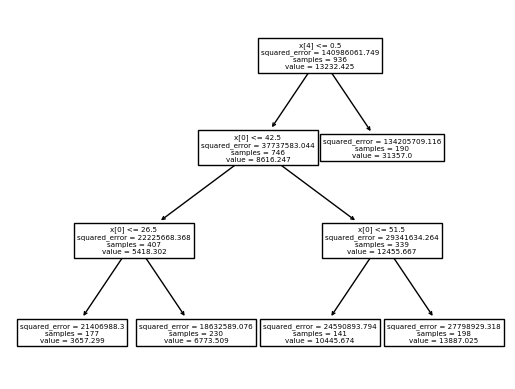

In [12]:
import matplotlib.pyplot as plt 
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

In [15]:
r_score

0.7305196897972378

In [16]:
import pickle
filename="finalized_model_linear.sav"

In [17]:
pickle.dump(regressor,open(filename,'wb'))

In [18]:
loaded_model=pickle.load(open("finalized_model_linear.sav",'rb'))# rb mean read binary
result=loaded_model.predict([[123,456,789,987,654]])

C:\Python\Users\kavit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [19]:
result

array([31357.])

In [20]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("children:"))
sex_male_input=float(input("sex Male 0 or 1:"))
smoker_yes_input=int(input("sex female 0 or 1:")) 

Age: 43
BMI: 43
children: 1
sex Male 0 or 1: 0
sex female 0 or 1: 1


In [21]:
Future_Prediction=loaded_model.predict([[age_input,bmi_input,children_input,sex_male_input,smoker_yes_input]])
print("Predicted Profit :",result)

Predicted Profit : [31357.]


C:\Python\Users\kavit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
